In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression

In [3]:
#导入数据exp3_2.csv
data = pd.read_csv('exp3_2.csv')
#对AGE列进行空值填充
data['AGE'].fillna(data['AGE'].mean(), inplace=True)
#将AGE列转换为整数型
data['AGE'] = data['AGE'].astype(int)
#提取FFP_DATE中的年数据并形成新的列ffp_year
data['ffp_year'] = data['FFP_DATE'].str[0:4]
#将FFP_TIER,FLIGHT_COUNT,LAST_TO_END,SEG_KM_SUM,EXANGE_COUNT,Points_Sum,AGE,ffp_year列提取出来形成新的数据集
data_new = data[['FFP_TIER','FLIGHT_COUNT','LAST_TO_END','SEG_KM_SUM','EXCHANGE_COUNT','Points_Sum','AGE','ffp_year']]
#将列名更改为会员卡级别，飞行次数,最后一次乘机时长,飞行总公里数,积分兑换数,总累计积分,客户年龄,入会时间
data_new.columns = ['会员卡级别','飞行次数','最后一次乘机时长','飞行总公里数','积分兑换数','总累计积分','客户年龄','入会时间']
#打印表格
print(data)
print(data_new)

       MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0          54993  2006/11/02        2008/12/24      男         6            .   
1          28065  2007/02/19        2007/08/03      男         6          NaN   
2          55106  2007/02/01        2007/08/30      男         6            .   
3          21189  2008/08/22        2008/08/23      男         5  Los Angeles   
4          39546  2009/04/10        2009/04/15      男         6           贵阳   
...          ...         ...               ...    ...       ...          ...   
62983      18375  2011/05/20        2013/06/05      女         4           广州   
62984      36041  2010/03/08        2013/09/14      男         4           佛山   
62985      45690  2006/03/30        2006/12/02      女         4           广州   
62986      61027  2013/02/06        2013/02/14      女         4           广州   
62987      61340  2013/02/17        2013/02/17      女         4           上海   

      WORK_PROVINCE WORK_COUNTRY  AGE  

In [4]:
#对新的数据进行描述分析
data_new.describe

<bound method NDFrame.describe of        会员卡级别  飞行次数  最后一次乘机时长  飞行总公里数  积分兑换数   总累计积分  客户年龄  入会时间
0          6   210         1  580717     34  619760    31  2006
1          6   140         7  293678     29  415768    42  2007
2          6   135        11  283712     20  406361    40  2007
3          5    23        97  281336     11  372204    64  2008
4          6   152         5  309928     27  338813    48  2009
...      ...   ...       ...     ...    ...     ...   ...   ...
62983      4     2       297    1134      1   12318    25  2011
62984      4     4        89    8016     14  106972    38  2010
62985      4     2        29    2594      0       0    43  2006
62986      4     2       400    3934      0       0    36  2013
62987      4     2       403    4222      0       0    29  2013

[62988 rows x 8 columns]>

             会员卡级别      飞行次数  最后一次乘机时长    飞行总公里数     积分兑换数     总累计积分      客户年龄
会员卡级别     1.000000  0.582447 -0.206313  0.522350  0.342355  0.559249  0.078464
飞行次数      0.582447  1.000000 -0.404999  0.850411  0.502501  0.747092  0.073193
最后一次乘机时长 -0.206313 -0.404999  1.000000 -0.369509 -0.169717 -0.292027 -0.025553
飞行总公里数    0.522350  0.850411 -0.369509  1.000000  0.507819  0.853014  0.087092
积分兑换数     0.342355  0.502501 -0.169717  0.507819  1.000000  0.578581  0.029635
总累计积分     0.559249  0.747092 -0.292027  0.853014  0.578581  1.000000  0.074611
客户年龄      0.078464  0.073193 -0.025553  0.087092  0.029635  0.074611  1.000000


c:\Users\FangWei\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\FangWei\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


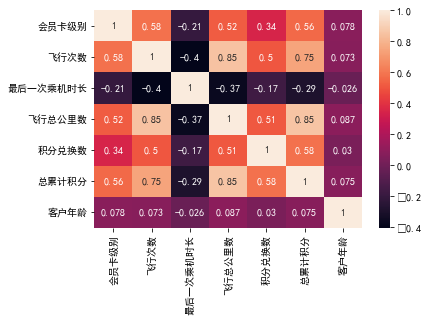

In [8]:
#解决绘制的热力图乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
#对新的数据进行相关性分析
corr=data_new.corr()
#打印相关性分析结果
print(corr)
#绘制热力图
sns.heatmap(data_new.corr(),annot=True)
plt.show()